<a href="https://colab.research.google.com/github/ajou-y0uC4N/y0uC4N/blob/main/DNN_case10_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import drive

In [34]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/team_prj/data/type10.csv")
df.loc[(df.iloc[:,0] == "Attack") & (df.iloc[:,1].between(55,125)), df.columns[0]] = "Flooding"
df.loc[(df.iloc[:,0] == "Attack") & (df.iloc[:,1].between(115,165)), df.columns[0]] = "Fuzzy"
df.loc[(df.iloc[:,0] == "Attack") & (df.iloc[:,1].between(165,205)), df.columns[0]] = "Replay"
print(df.head())


     type      time  isCan0  priority  messageID  isService  serviceNODEID  \
0  Normal  0.000000       1         5       1030          0              1   
1  Normal  0.000139       1         5       1030          0              1   
2  Normal  0.004482       1         5       1030          0              1   
3  Normal  0.004641       1         5       1030          0              1   
4  Normal  0.009330       1         5       1030          0              1   

   byteSize  data[0]  data[1]  data[2]  data[3]  data[4]  data[5]  data[6]  \
0         8      166       53        0        0        0        0        0   
1         7        0        0        0        0        0        0      116   
2         8      166       53        0        0        0        0        0   
3         7        0        0        0        0        0        0      117   
4         8      166       53        0        0        0        0        0   

   data[7]  7byteNullCnt  8byteNullCnt  
0      148           

In [36]:
from keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df["type"])
X = df.drop(columns=["type",'time'])
print(df["type"].unique())
print(f"X shape: {X.shape}")
print(f"y shape: {y_encoded.shape}")
y_one_hot = to_categorical(y_encoded, num_classes=4)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

['Normal' 'Flooding' 'Fuzzy' 'Replay']
X shape: (207380, 16)
y shape: (207380,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)

In [38]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               2176      
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 4)                 132       
                                                                 
Total params: 12644 (49.39 KB)
Trainable params: 12644 (49.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/100
4148/4148 [==============================] - 15s 3ms/step - loss: 0.3354 - accuracy: 0.8475 - val_loss: 0.3103 - val_accuracy: 0.8575
Epoch 2/100
4148/4148 [==============================] - 13s 3ms/step - loss: 0.3041 - accuracy: 0.8563 - val_loss: 0.2984 - val_accuracy: 0.8502
Epoch 3/100
4148/4148 [==============================] - 13s 3ms/step - loss: 0.2939 - accuracy: 0.8581 - val_loss: 0.2936 - val_accuracy: 0.8651
Epoch 4/100
4148/4148 [==============================] - 13s 3ms/step - loss: 0.2877 - accuracy: 0.8594 - val_loss: 0.2865 - val_accuracy: 0.8650
Epoch 5/100
4148/4148 [==============================] - 13s 3ms/step - loss: 0.2834 - accuracy: 0.8621 - val_loss: 0.2912 - val_accuracy: 0.8605
Epoch 6/100
4148/4148 [==============================] - 13s 3ms/step - loss: 0.2798 - accuracy: 0.8644 - val_loss: 0.2792 - val_accuracy: 0.8678
Epoch 7/100
4148/4148 [==============================] - 13s 3ms/step - loss: 0.2782 - accuracy: 0.8633 - val_loss: 0.2780 -

In [40]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# Predicting the labels for the test set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

# Decoding the one-hot encoded test labels back to original labels
y_test_decoded = y_test.argmax(axis=1)

# Generating the classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_decoded, y_pred, target_names=label_encoder.classes_, digits=6))

1297/1297 [==============================] - 2s 2ms/step - loss: 0.2726 - accuracy: 0.8678
Test loss: 0.27260857820510864
Test accuracy: 0.8678271770477295
1297/1297 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

    Flooding   0.000000  0.000000  0.000000      4647
       Fuzzy   0.850937  0.973229  0.907984      7508
      Normal   0.866215  0.998590  0.927704     26240
      Replay   0.941266  0.806232  0.868531      3081

    accuracy                       0.867827     41476
   macro avg   0.664604  0.694513  0.676055     41476
weighted avg   0.771973  0.867827  0.815798     41476



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


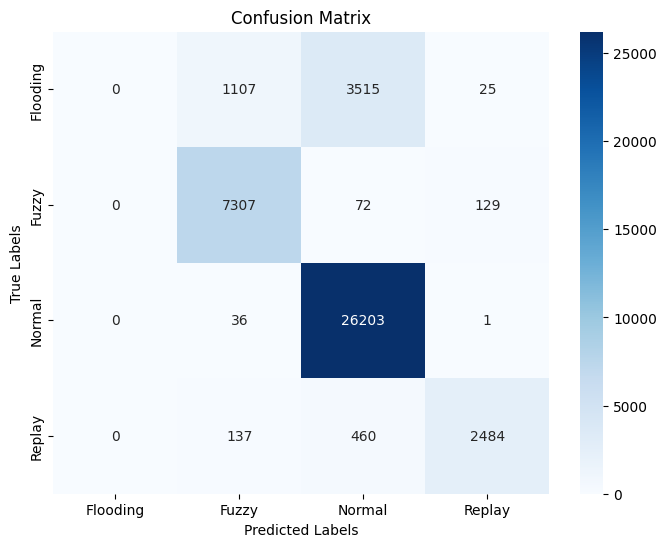

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test_decoded, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-42-7f749624cb84>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')


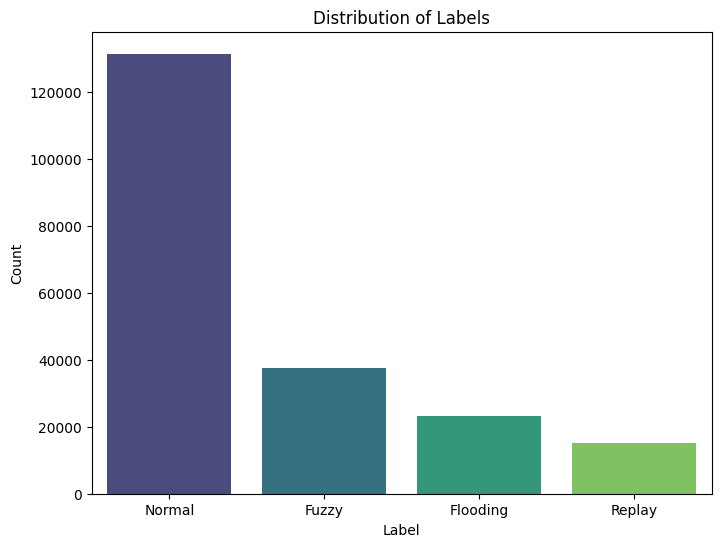

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 라벨 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()


In [81]:
from imblearn.over_sampling import SMOTE
y_encoded = label_encoder.fit_transform(df["type"])
X = df.drop(columns=["type",'time'])
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y_encoded)
#y_train_smote = y_train_smote
# 원-핫 인코딩
X_train_smote_df = pd.DataFrame(X_train_smote, columns=X.columns)


# 원-핫 인코딩
y_train_smote_encoded = to_categorical(y_train_smote, num_classes=4)
y_test_encoded = to_categorical(y_test, num_classes=4)


   isCan0  priority  messageID  isService  serviceNODEID  byteSize  data[0]  \
0       1         5       1030          0              1         8      166   
1       1         5       1030          0              1         7        0   
2       1         5       1030          0              1         8      166   
3       1         5       1030          0              1         7        0   
4       1         5       1030          0              1         8      166   

   data[1]  data[2]  data[3]  data[4]  data[5]  data[6]  data[7]  \
0       53        0        0        0        0        0      148   
1        0        0        0        0        0      116       -1   
2       53        0        0        0        0        0      149   
3        0        0        0        0        0      117       -1   
4       53        0        0        0        0        0      150   

   7byteNullCnt  8byteNullCnt  
0             0             5  
1             6             0  
2             0     

<ipython-input-82-f5efacd3cdd2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote_series, order=y_train_smote_series.value_counts().index, palette='viridis')


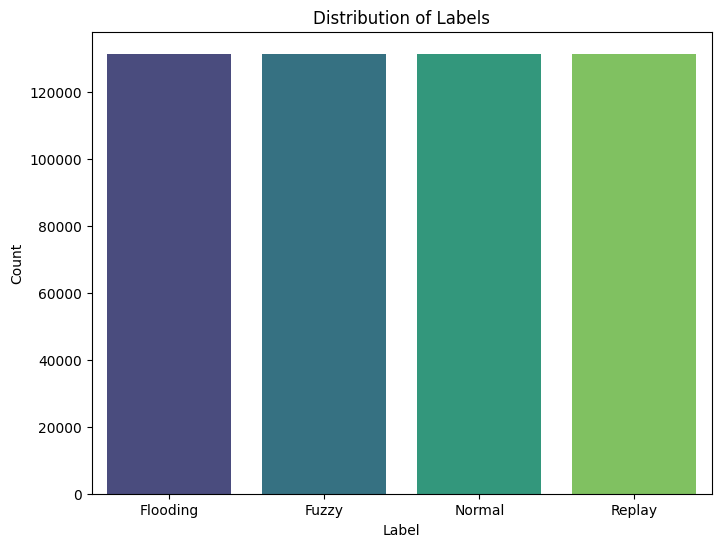

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
print(X_train_smote_df.head())
y_train_smote_series = pd.Series(y_train_smote, name='type')

#sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')
# 라벨 분포 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote_series, order=y_train_smote_series.value_counts().index, palette='viridis')
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()


In [83]:
X_train_smote_, X_test_smote_, y_train_smote_, y_test_smote_ = train_test_split(X_train_smote, y_train_smote_encoded, test_size=0.2, random_state=42)
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_smote.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # 4 output nodes for 4 classes
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train_smote_, y_train_smote_,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])

# 모델 평가


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               2176      
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 4)                 132       
                                                                 
Total params: 12644 (49.39 KB)
Trainable params: 12644 (49.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
10523/10523 [==============================] - 35s 3ms/step - loss: 0.5768 - accuracy: 0.7962 - val_loss: 0.4513 - val_accuracy: 0.8238
E

3289/3289 [==============================] - 4s 1ms/step
[0 2 2 ... 1 3 1]
[[1 0 0 0]
 [0 2 0 0]
 [0 2 0 0]
 ...
 [0 1 0 0]
 [0 3 0 0]
 [1 0 0 0]]
[0 1 1 ... 1 1 0]
              precision    recall  f1-score   support

    Flooding   0.844629  0.762779  0.801620     26469
       Fuzzy   0.811453  0.331598  0.470804     78755
      Normal   0.000000  0.000000  0.000000         0
      Replay   0.000000  0.000000  0.000000         0

    accuracy                       0.440061    105224
   macro avg   0.414020  0.273594  0.318106    105224
weighted avg   0.819798  0.440061  0.554020    105224



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


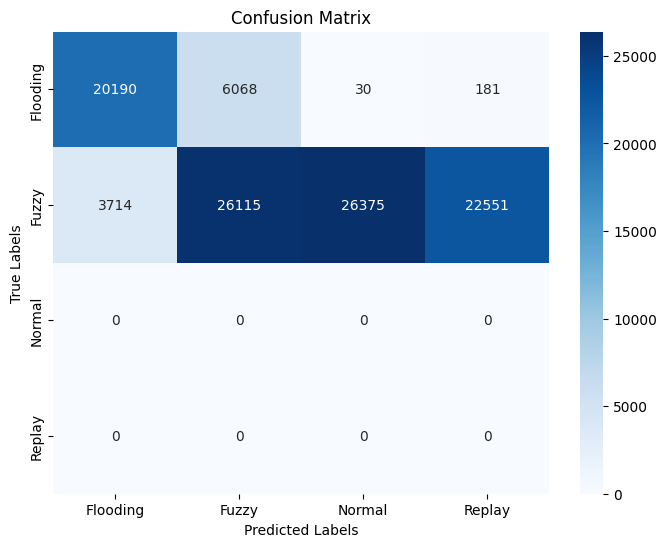

In [84]:
y_test_encoded = to_categorical(y_test_smote_, num_classes=4)


# 예측 및 보고서 생성
y_pred_prob = model.predict(X_test_smote_)
y_pred = y_pred_prob.argmax(axis=1)

# 디코딩된 원-핫 인코딩 테스트 라벨을 정수 라벨로 변환
y_test_decoded = y_test_encoded.argmax(axis=1)
print(y_pred)
print(y_test_decoded)
y_test_decoded_single = np.argmax(y_test_decoded, axis=1)
print(y_test_decoded_single)
# 분류 보고서 생성
print(classification_report(y_test_decoded_single, y_pred, target_names=label_encoder.classes_, digits=6))

# 혼동 행렬 생성 및 시각화
conf_matrix = confusion_matrix(y_test_decoded_single, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.save('my_dnn_model.h5')